<a href="https://colab.research.google.com/github/kezamamio/CpE-AIML/blob/main/58033_MEX_Amamio/58033_MEX_Amamio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1
## Lecture Requirement

* TrashTakers Lecture Requirement: [Fire and Theft in Chicago - Purpose, Needs Statement, and Significance](https://drive.google.com/file/d/1OrNA3z2aUahU5IRHFQRZa5t7AXn3ehuA/view?usp=sharing)



## Lab Requirement
  ### Data Exploration, Cleaning, and Visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("/content/slr05.csv") 
data.head(10)

,X,Y
0,6.2,29
1,9.5,44
2,10.5,36
3,7.7,37
4,8.6,53
5,34.1,68
6,11.0,75
7,6.9,18
8,7.3,31
9,15.1,25


In [3]:
data.shape

(42, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       42 non-null     float64
 1   Y       42 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 800.0 bytes


In [5]:
# Rename X and Y columns into 'fires' and 'thefts', respectively
data.rename(
    columns = ({"X": "fires", "Y": "thefts"}),
    inplace = True,
  )
data.head(10)                                                         ## Prints first 10 datapoints

,fires,thefts
0,6.2,29
1,9.5,44
2,10.5,36
3,7.7,37
4,8.6,53
5,34.1,68
6,11.0,75
7,6.9,18
8,7.3,31
9,15.1,25


In [6]:
data.mean()

fires     12.692857
thefts    33.666667
dtype: float64

In [7]:
# How to recognize and Treat missing values and outliers in Pandas
## Quality Check 
data.isnull()

,fires,thefts
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [8]:
# How to recognize and Treat missing values and outliers in Pandas
## Quality Check
round(100*(data.isnull().sum()/len(data)),2).sort_values(ascending=False)

thefts    0.0
fires     0.0
dtype: float64

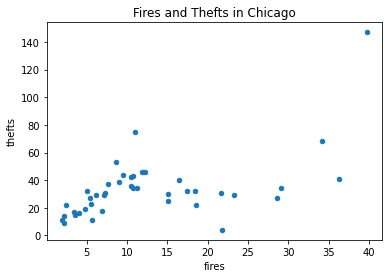

In [9]:
# Since there are no missing or null values
data.plot(kind = 'scatter', x = 'fires', y = 'thefts')
plt.title('Fires and Thefts in Chicago')
plt.show()

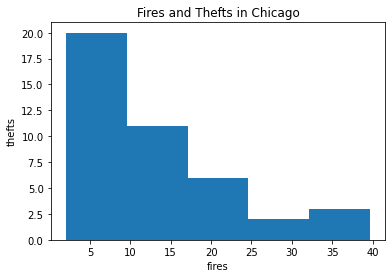

In [10]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(data['fires'],bins = 5)
plt.title('Fires and Thefts in Chicago')
plt.xlabel('fires')
plt.ylabel('thefts')
plt.show()

### Correlations


In [11]:
X = data["fires"]
Y = data["thefts"]
corr = X.corr(Y)
corr

0.5511213020718385

### Variability

In [12]:
y_test = data['thefts'].to_numpy()
ymean = y_test.mean()
yvar = np.sum(np.square(y_test-ymean))/y_test.size
yvar

518.2222222222222

In [13]:
x_test = data.drop('thefts',axis=1).to_numpy().reshape(1,-1)
xmean = x_test.mean()
xvar = np.sum(np.square(x_test-xmean))/x_test.size
xvar

91.23875850340134

In [14]:
variance = np.var(data)
variance

fires      91.238759
thefts    518.222222
dtype: float64

# Problem 2
## Lecture Requirement

* TrashTakers Lecture Requirement: [Linear Regression](https://drive.google.com/file/d/1qCh8bBEWQRKKJ_Ko2S-b0HpZEx1_rtWI/view?usp=sharing)


## Lab Requirement


In [15]:
class LinearRegression():
    
    def __init__(self):
        self.model_ = 0
        #self.pred = 0
    
    ## Pearsons_R
    def pearsons_r(self, vectA, vectB):
        cov_xy = np.cov(vectA,vectB, bias=True)[0,1]
        std_x = np.std(vectA)
        std_y = np.std(vectB)
        return cov_xy / (std_x*std_y)
    
    ## Train
    def train(self,X,y):
        std_X, std_y = np.std(X), np.std(y)
        rho = np.corrcoef(X,y)[0,1]
        w1 = rho*(std_y/std_X)
        w0 = y.mean()-w1*X.mean()
        self.model_= np.array([w1, w0]).reshape(2,1)
        return np.array([w1, w0]).reshape(2,1)
    
    ## Covariance
    def covariance(self, vectA, vectB):
        #vectA = vectA.reshape(1,-1)
        return np.cov(vectA,vectB)[0,1]
    
    ## Predict
    def predict(self, x):
        std_X, std_y = np.std(X), np.std(y)
        rho = np.corrcoef(X,y)[0,1]
        w1 = rho*(std_y/std_X)
        w0 = y.mean()-w1*X.mean()
        self.pred = w0 + w1*x
        return np.array(self.pred)
    
    ## Evaluate
    def evaluate(self):
        y_hat = self.predict(X)
        sst=np.sum(np.square(y-y.mean()))
        ssr=np.sum(np.square(y_hat-y.mean()))
        sse=np.sum(np.square(y_hat-y))
        mse=np.mean(np.square(y_hat-y))
        rmse=np.sqrt(mse)
        rss=1-sse/sst
        arss=1-(((1-rss)*(y.size-1))/(y.size-1-1))
        eval_dict ={'Measures of Error':['Sum of Squares Total', 'Sum of Squares Regression',
                                        'Sum of Squares Error', 'Mean Squared Error', 'Root Mean Squared Error',
                                        'R-Squared', 'Adjusted R-Squared'],
                    'Values':[sst,ssr,sse,mse,rmse,rss,arss]
                   }
        df = pd.DataFrame(eval_dict)
        return df
    
    ## Visualize -- the only problem ever
    def visualize(self):
        std_X = np.std(X)
        std_y = np.std(y)
        rho = np.corrcoef(X,y)[0,1]
        w1 = rho*(std_y/std_X)
        w0 = y.mean()-w1*X.mean()
        model_= w0 + w1*X

        plt.figure(figsize=(5,5), dpi=400)
        plt.grid()
        plt.plot(X, np.array(self.pred), color = 'red', linewidth = 2)
        plt.scatter(X,y)
        plt.show()
        ##plt.plot(X, model_)
        #plt.savefig("output.jpg")

In [16]:
X1 = pd.read_csv("slr05.csv")
y = X1['Y'].to_numpy()
X = X1.drop('Y',axis=1).to_numpy()
X = X.reshape(1,-1)

### Linear Regression Model

In [17]:
regressor = LinearRegression()

In [18]:
r = regressor.pearsons_r(X,y)
r

0.5511213020718384

In [19]:
R = regressor.covariance(X,y)
R

122.7609756097561

In [20]:
regressor.train(X,y)
regressor.model_

array([[ 1.313456  ],
       [16.99515723]])

In [21]:
preds = regressor.predict(X)
preds

array([[25.13858446, 29.47298928, 30.78644528, 27.10876847, 28.29087888,
        61.784007  , 31.44317329, 26.05800367, 26.58338607, 36.82834291,
        55.21672698, 19.88476044, 24.48185646, 19.62206924, 20.27879725,
        22.24898125, 24.08781966, 19.88476044, 26.45204047, 36.82834291,
        38.66718131, 41.16274772, 64.54226461, 69.13936063, 41.29409332,
        47.59868215, 33.01932049, 24.35051086, 45.62849814, 45.36580694,
        28.81626128, 21.72359885, 23.56243726, 54.55999897, 39.84929172,
        31.83721009, 21.46090765, 32.62528369, 30.78644528, 31.04913649,
        31.18048209, 23.29974606]])

In [22]:
model_stats = regressor.evaluate()
model_stats

,Measures of Error,Values
0,Sum of Squares Total,21765.333333
1,Sum of Squares Regression,6610.886764
2,Sum of Squares Error,15154.446569
3,Mean Squared Error,360.820156
4,Root Mean Squared Error,18.995267
5,R-Squared,0.303735
6,Adjusted R-Squared,0.286328


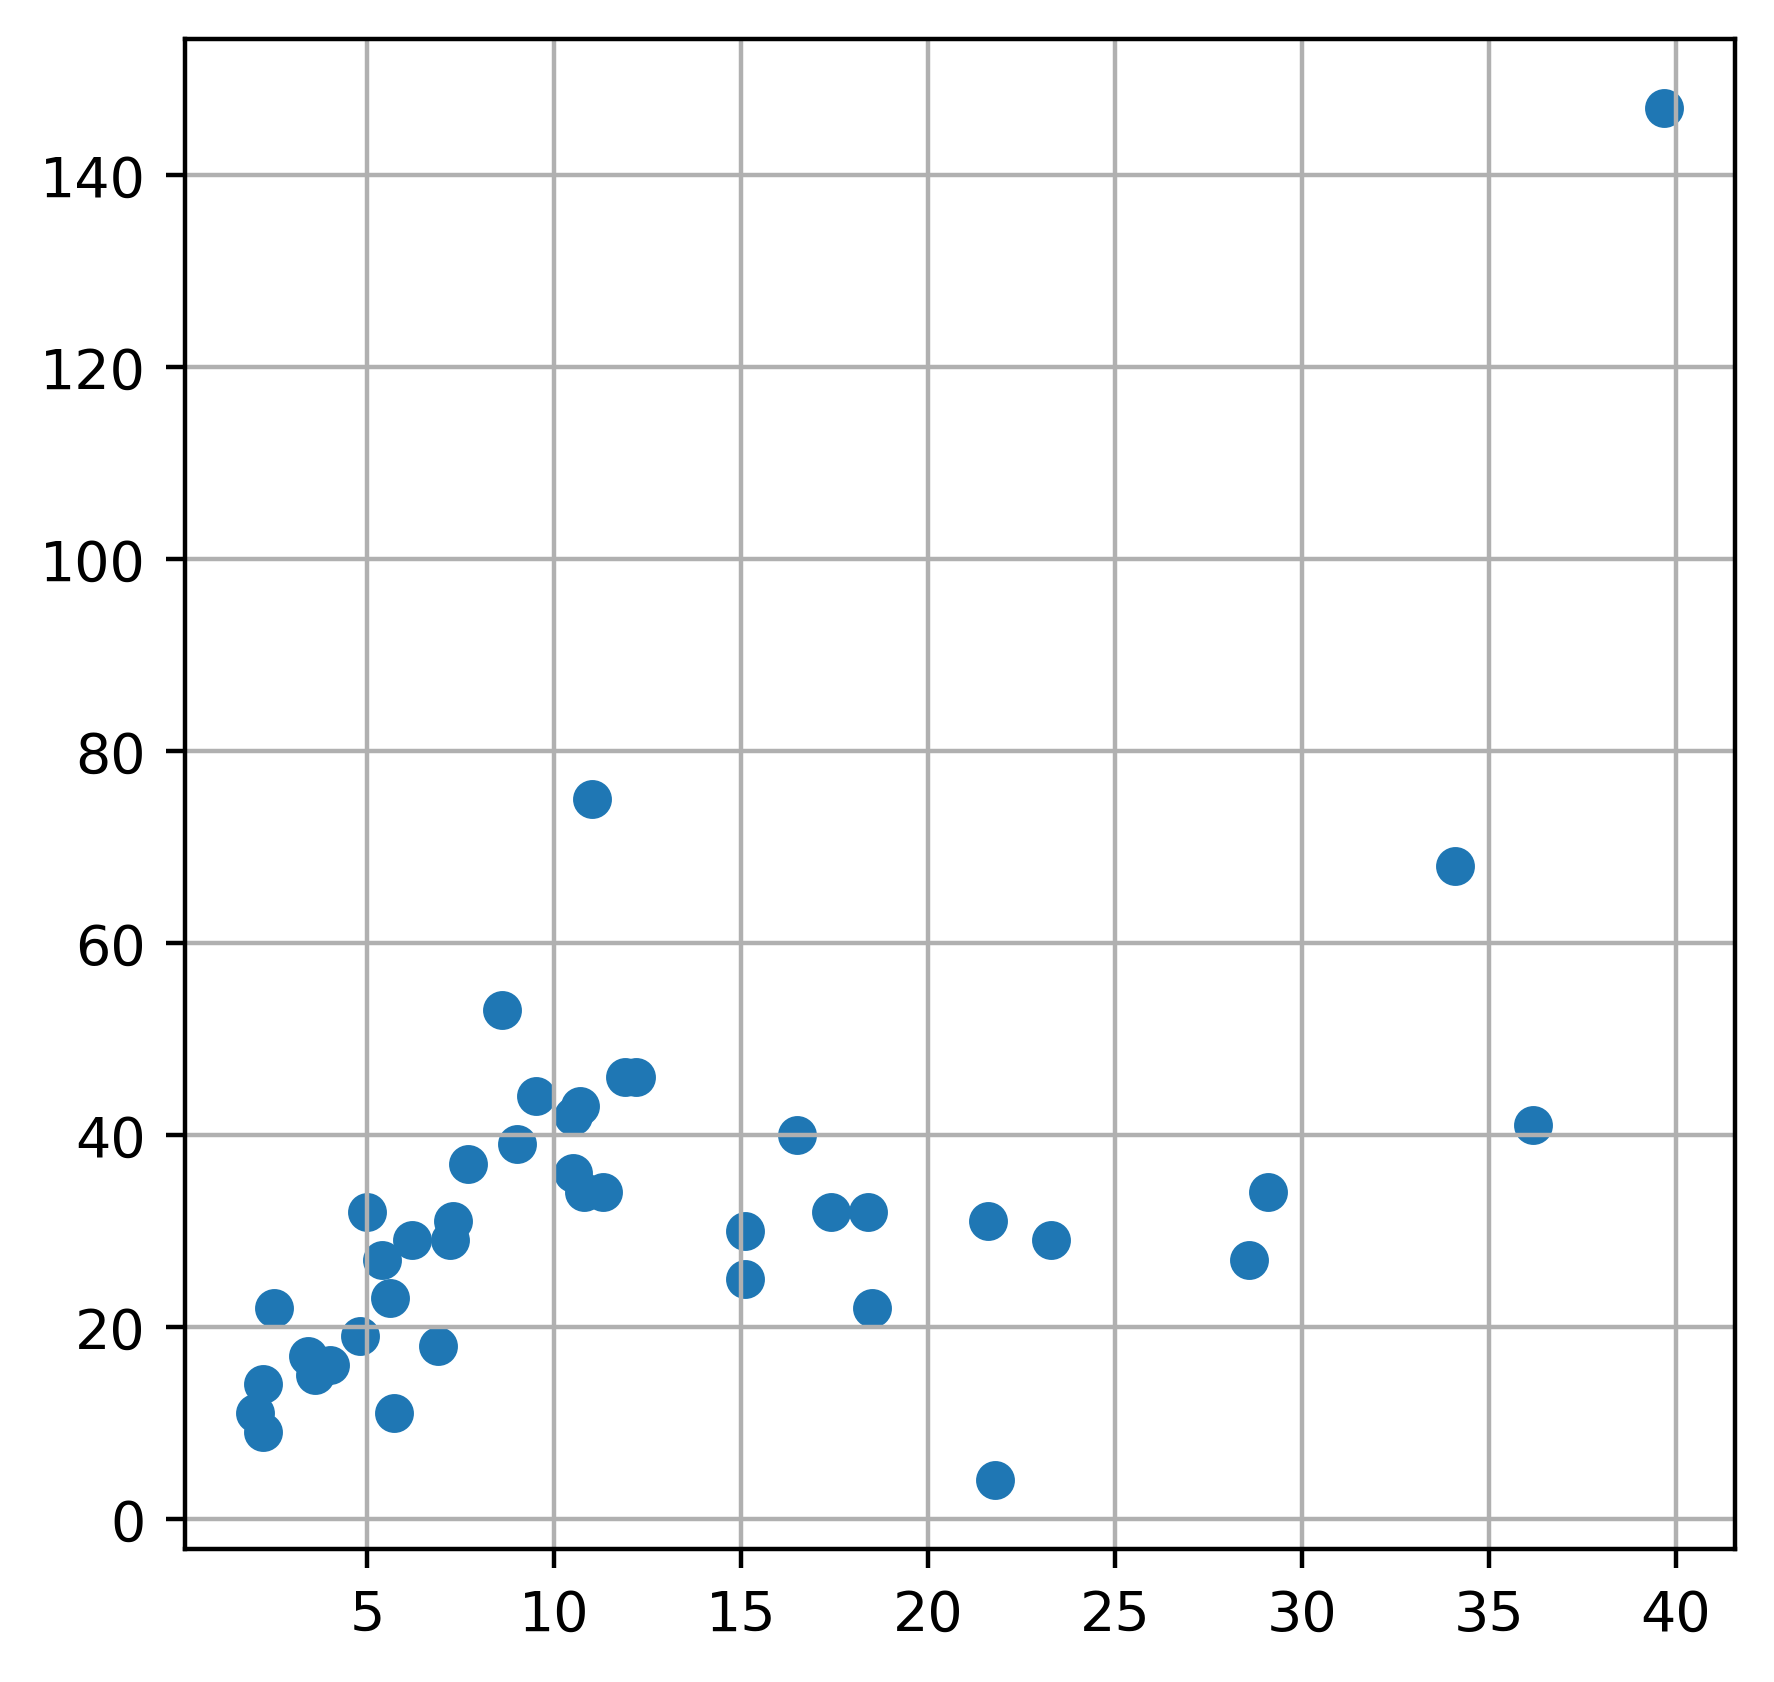

In [23]:
regressor.visualize()

# Problem 3
* Amamio Problem 3 Lecture Requirement: [Problem3_Amamio](https://drive.google.com/file/d/1SoeOXqYHnZVwy-n2cs2K5iQVWpXqLoob/view?usp=sharing)

